<a href="https://colab.research.google.com/github/thrineshthode/project/blob/main/twitter_sentimental_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
from google.colab import files
twitter=files.upload()

Saving twitter.csv to twitter (2).csv


In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
tweets_df=pd.read_csv('twitter.csv')
tweets_df

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
...,...,...,...
31957,31958,0,ate @user isz that youuu?ðððððð...
31958,31959,0,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,..."


In [9]:
tweets_df.describe()


,id,label
count,31962.000000,31962.000000
mean,15981.500000,0.070146
std,9226.778988,0.255397
min,1.000000,0.000000
25%,7991.250000,0.000000
50%,15981.500000,0.000000
75%,23971.750000,0.000000
max,31962.000000,1.000000


In [10]:
tweets_df['tweet']

0         @user when a father is dysfunctional and is s...
1        @user @user thanks for #lyft credit i can't us...
2                                      bihday your majesty
3        #model   i love u take with u all the time in ...
4                   factsguide: society now    #motivation
                               ...                        
31957    ate @user isz that youuu?ðððððð...
31958      to see nina turner on the airwaves trying to...
31959    listening to sad songs on a monday morning otw...
31960    @user #sikh #temple vandalised in in #calgary,...
31961                     thank you @user for you follow  
Name: tweet, Length: 31962, dtype: object

In [11]:
tweets_df=tweets_df.drop(['id'],axis=1)
tweets_df

,label,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation
...,...,...
31957,0,ate @user isz that youuu?ðððððð...
31958,0,to see nina turner on the airwaves trying to...
31959,0,listening to sad songs on a monday morning otw...
31960,1,"@user #sikh #temple vandalised in in #calgary,..."


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fdccaf3ac10>]],
      dtype=object)

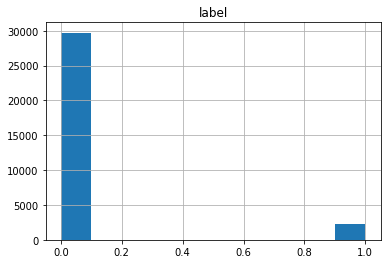

In [12]:
tweets_df.hist(bins=10)

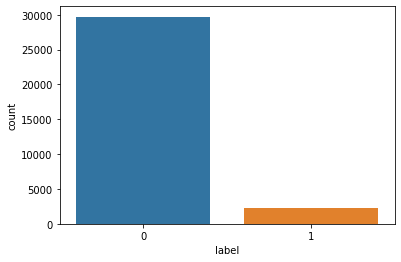

In [13]:
sns.countplot(x='label',data=tweets_df)


In [14]:
#length of tweets
tweets_df['length']=tweets_df['tweet'].apply(len)
tweets_df.describe()

,label,length
count,31962.000000,31962.000000
mean,0.070146,84.739628
std,0.255397,29.455749
min,0.000000,11.000000
25%,0.000000,63.000000
50%,0.000000,88.000000
75%,0.000000,108.000000
max,1.000000,274.000000


In [15]:
#retreiving shortest tweet 
short_tweet=tweets_df[tweets_df['length']==11].iloc[0]
print(short_tweet)
avg_tweet=tweets_df[tweets_df['length']==85].iloc[0:]
avg_tweet

label               0
tweet     i love you 
length             11
Name: 25195, dtype: object


,label,tweet,length
115,0,â #under the spell of brexit referendum - c...,85
242,0,make today count! #mondaymotivation #livelifet...,85
384,0,"dream palace, can we move in already? #stellar...",85
573,0,@user monkeys are also declared as vermin. no ...,85
634,0,save thousands $$ free search x logins x broke...,85
...,...,...,...
31393,0,#flagday2016 #flag #day #2016 #(30 #photos) ...,85
31468,0,jts88troxy theater jts88@user ð #love #si...,85
31542,0,stretched to the limit and still #waiting pati...,85
31773,0,this reminds me of this. i am love these two...,85


In [16]:
#seperating positive ang negative tweets
positive=tweets_df[tweets_df['label']==0]
positive
negative=tweets_df[tweets_df['label']==1]
negative

,label,tweet,length
13,1,@user #cnn calls #michigan middle school 'buil...,74
14,1,no comment! in #australia #opkillingbay #se...,101
17,1,retweet if you agree!,22
23,1,@user @user lumpy says i am a . prove it lumpy.,47
34,1,it's unbelievable that in the 21st century we'...,104
...,...,...,...
31934,1,lady banned from kentucky mall. @user #jcpenn...,59
31946,1,@user omfg i'm offended! i'm a mailbox and i'...,82
31947,1,@user @user you don't have the balls to hashta...,112
31948,1,"makes you ask yourself, who am i? then am i a...",87


In [17]:
sentences=tweets_df['tweet'].tolist()
sentences_as_one_string=" ".join(sentences)

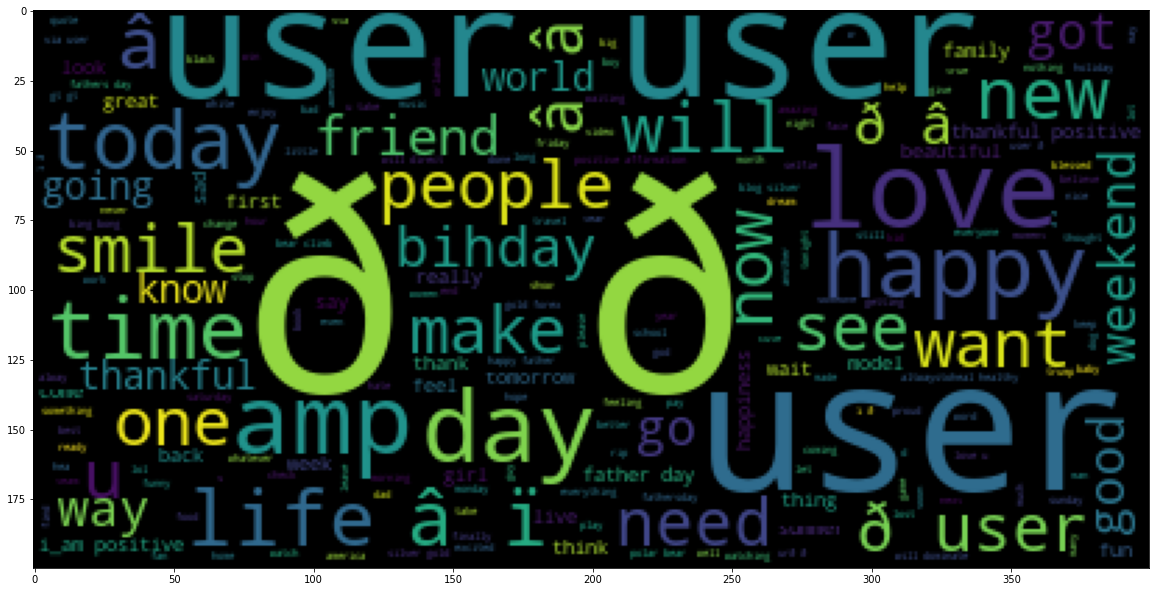

In [18]:
#!pip install wordcloud
from wordcloud import WordCloud
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(sentences_as_one_string))

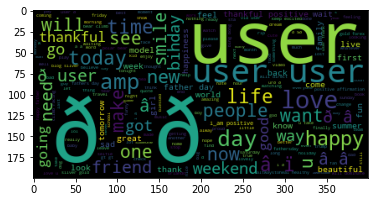

In [19]:
positive_sentence=positive['tweet'].tolist()
positive_sentence_total=" ".join(positive_sentence)
plt.imshow(WordCloud().generate(positive_sentence_total))

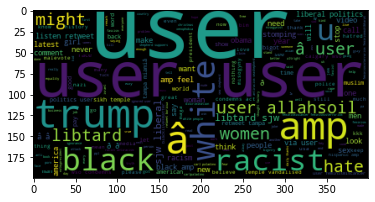

In [20]:
#negative wordcloud
from wordcloud import WordCloud
negative_sentences=negative['tweet'].tolist()
negative_sentences_into_string=" ".join(negative_sentences)
plt.imshow(WordCloud().generate(negative_sentences_into_string))

In [21]:
#Removing punctuations and stopwords--Data Cleaning
#nltk --natural language toolkit
import nltk
nltk.download('stopwords')
import string
from nltk.corpus import stopwords
#Removing Punctuation
Test="Good Morning everyone (: I love Machine Learning and AI"
test_removed_punc=[char for char in Test if char not in string.punctuation]
test_removed_punc
test_removed_punc_sent="".join(test_removed_punc)
test_removed_punc_sent
#Removing Stopwords
stopwords.words('english')
test_clean=[word for word in test_removed_punc_sent.split(" ") if word.lower() not in stopwords.words('english')]
test_clean_sent= " ".join(test_clean)
test_clean_sent





[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


'Good Morning everyone  love Machine Learning AI'

In [22]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [33]:
from sklearn.feature_extraction.text import CountVectorizer
sample_data=['my name is thrinesh','my name is Thode thrinesh','no my my name is thode thrinesh reddy']
vectorizer=CountVectorizer(analyzer=message_cleaning)
tweets_countvectorizer=CountVectorizer(analyzer=message_cleaning,dtype='uint8').fit_transform(tweets_df_clean).toarray()
tweets_countvectorizer.shape


(31962, 37)

In [27]:
def message_cleaning(message):
  Test_punc_removed=[char for char in message if char not in string.punctuation]
  Test_punc_removed_join="".join(Test_punc_removed)
  Test_punc_removed_join_clean=[word for word in Test_punc_removed_join.split() if word.lower() not in stopwords.words('english') ]
  return Test_punc_removed_join_clean

In [30]:
import re
#tweets_df
def message_cleaning(tweet):
  clean_tweets=" ".join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ",tweet).split(" "))
  cachedStopWords = stopwords.words("english")
  pattern = re.compile(r'\b(' + r'|'.join(cachedStopWords) + r')\b\s*')
  text = pattern.sub('', clean_tweets)
  return text

In [32]:
tweets_df_clean=tweets_df['tweet'].apply(clean1)
print(tweets_df_clean)
tweets_df_clean
tweets_df['tweet'][5]

0           father dysfunctional selfish drags kids dys...
1            thanks lyft credit use cause offer wheelch...
2                                           bihday majesty
3         model   love u take u time ur                ...
4                           factsguide  society motivation
                               ...                        
31957    ate   isz youuu                               ...
31958      see nina turner airwaves trying wrap mantle ...
31959    listening sad songs monday morning otw work sad  
31960       sikh  temple vandalised calgary   wso conde...
31961                                       thank follow  
Name: tweet, Length: 31962, dtype: object


'[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo  '

In [34]:
X=tweets_countvectorizer
y=tweets_df['label']


In [35]:
#Train Naive bayes classifier
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)


In [36]:
from sklearn.naive_bayes import MultinomialNB
NB_classifier=MultinomialNB()
NB_classifier.fit(X_train,y_train)



MultinomialNB()

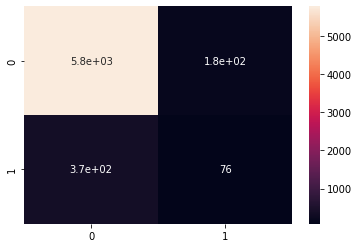

In [38]:
from sklearn.metrics import classification_report,confusion_matrix
y_predict_test=NB_classifier.predict(X_test)
cm=confusion_matrix(y_test,y_predict_test)
sns.heatmap(cm,annot=True)
